# Asymptotic of Distribution Example B

In [1]:
import sympy as sp

from datetime import datetime
from matplotlib import pyplot as plot
from scipy.optimize import fsolve
from math import log

import DistExampB
import Map

from LocUtil import Grid1

In [2]:
dist = DistExampB.ExampB()
xSym = dist.xSym

#### Constants

In [3]:
nSamp = 100
nSinc = 8

nPlot = 101
figSize = (9, 6.5)

qMin = 0.0001
qMax = 0.9999

#### Basic Plots

Text(0, 0.5, 'PDF')

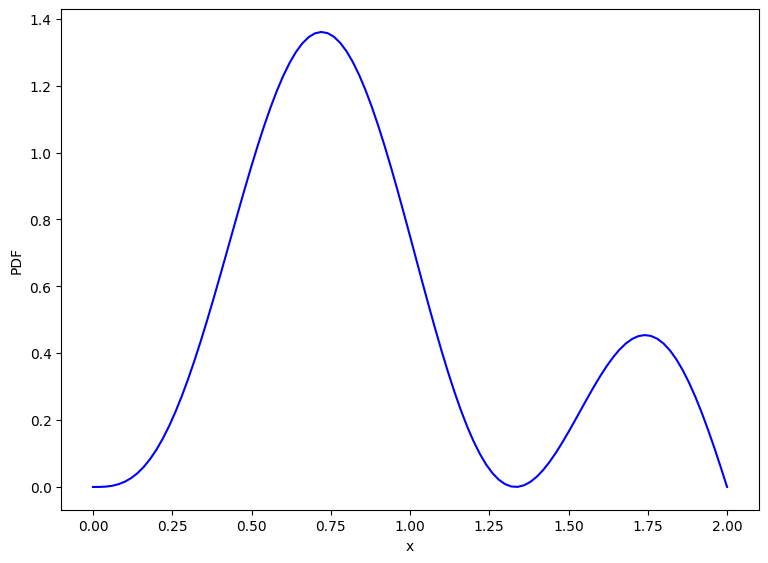

In [4]:
fig,ax = plot.subplots(1,1, figsize=figSize)

xGrid = Grid1(0,2, nPlot)
pdfGrid = [dist.Pdf(xV) for xV in xGrid]
plot.plot(xGrid,pdfGrid, c='blue')

plot.xlabel('x')
plot.ylabel('PDF')

Text(0, 0.5, 'CDF')

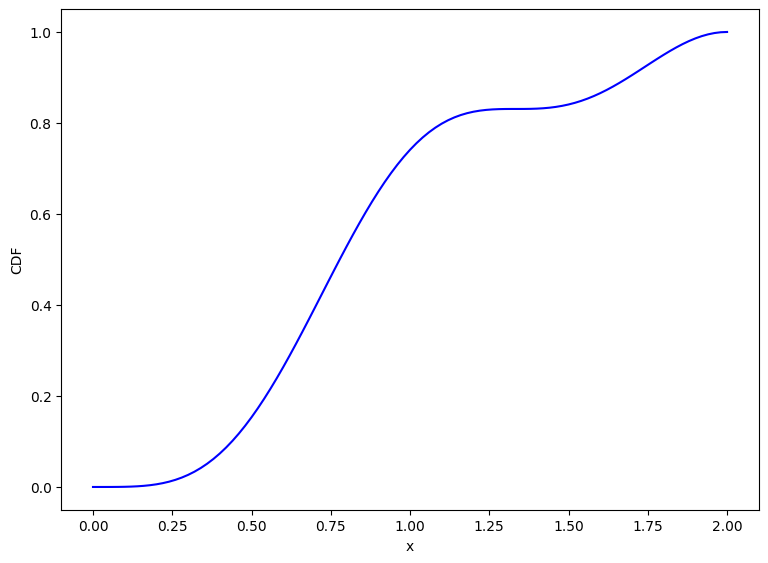

In [5]:
fig,ax = plot.subplots(1,1, figsize=figSize)

cdfX = [dist.Cdf(xV) for xV in xGrid]
plot.plot(xGrid,cdfX, c='blue')

plot.xlabel('x')
plot.ylabel('CDF')

### Map from x to z

In [6]:
zSym = sp.Symbol('z')

mapProb = Map.LogRatio(xSym,zSym, (0,2))
mapProb.forSym

log(x/(2 - x))

In [7]:
CdfZ = lambda z: dist.Cdf(mapProb.Inverse(z))

In [8]:
zMin = fsolve(lambda z: CdfZ(z) - qMin, 0)[0]
zMin

-3.3076903321343174

In [9]:
zMax = fsolve(lambda z: CdfZ(z) - qMax, 0)[0]
zMax

5.495495682069738

In [10]:
ArcTan = lambda q: log(q / (1 - q))

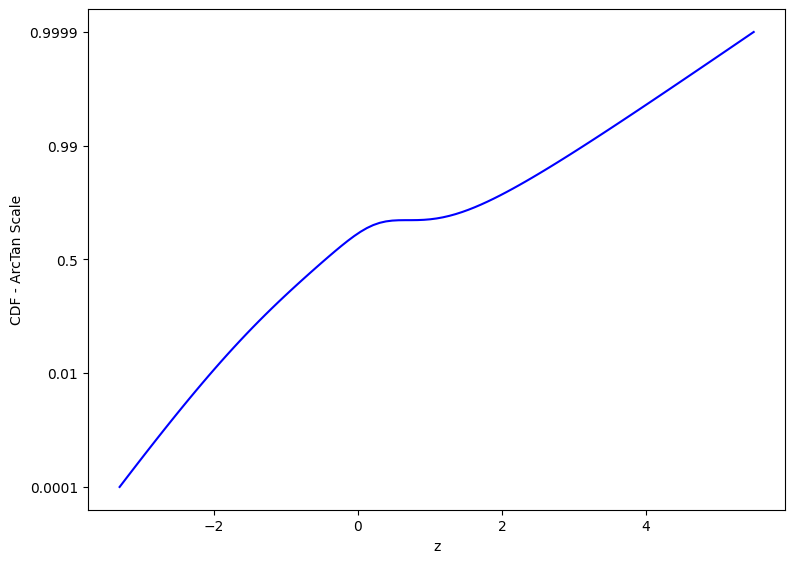

In [11]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfZ = [dist.Cdf(mapProb.Inverse(z)) for z in zGrid]

cdfZAtan = [ArcTan(q) for q in cdfZ]
plot.plot(zGrid,cdfZAtan, c='blue')

plot.xlabel('z')
plot.ylabel('CDF - ArcTan Scale')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [ArcTan(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

## Asymptotes

#### Code

TODO:  Handel it differently if it's from the left or from the right

In [15]:
def NonZeroTerm(express, xSym, point):
	ord = 8
	ySym = sp.Symbol('y')
	
	expressY = express.subs(xSym, ySym + point).simplify()
	seriesY = sp.series(expressY, n=ord).removeO()
	
	coef = tuple(seriesY.coeff(ySym, k).simplify() for k in range(ord))
	term = tuple((c,p) for (p,c) in enumerate(coef) if c != 0)
	
	return term

In [16]:
def MakeTerm(coef,pow, biNom):
	return coef * biNom ** pow

### Asymptotes of PDF

#### Left

In [17]:
leftPdfNonZero = NonZeroTerm(dist.pdfSym, xSym, 0)
leftPdfNonZero

((27*pi**2/16, 3),
 (-27*pi**2/32, 4),
 (-81*pi**4/256, 5),
 (81*pi**4/512, 6),
 (243*pi**6/10240, 7))

In [18]:
leftPdfAsym = MakeTerm(*leftPdfNonZero[0], xSym)
leftPdfAsym

27*pi**2*x**3/16

#### Right

In [19]:
rightPdfNonZero = NonZeroTerm(dist.pdfSym, xSym, 2)
rightPdfNonZero

((-3, 1),
 (-3/2, 2),
 (27*pi**2/16, 3),
 (27*pi**2/32, 4),
 (-81*pi**4/256, 5),
 (-81*pi**4/512, 6),
 (243*pi**6/10240, 7))

In [25]:
rightPdfAsym = MakeTerm(*rightPdfNonZero[0], xSym - 2)
rightPdfAsym

6 - 3*x

#### Plot

In [26]:
leftMaxX = fsolve(sp.lambdify(xSym, leftPdfAsym - 1), 1)[0]
leftMaxX

0.3915784873288213

In [27]:
rightPdfAsym

6 - 3*x

In [28]:
rightMinX = fsolve(sp.lambdify(xSym, rightPdfAsym - 1), 1)[0]
rightMinX

1.6666666666666667

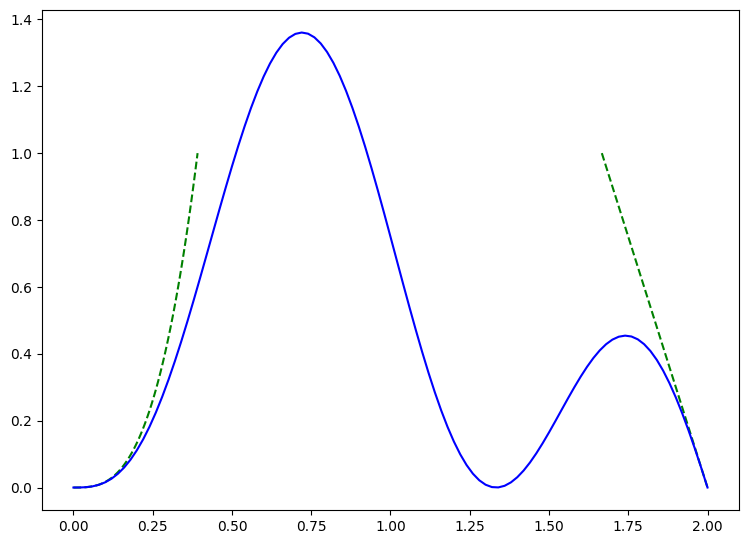

In [29]:
fig,ax = plot.subplots(1,1, figsize=figSize)

leftGrid = Grid1(0,leftMaxX, nPlot)
leftAsymX = [leftPdfAsym.subs(xSym, x).evalf() for x in leftGrid]
plot.plot(leftGrid, leftAsymX, '--', c='green')

rightGrid = Grid1(rightMinX,2, nPlot)
rightAsymX = [rightPdfAsym.subs(xSym, x).evalf() for x in rightGrid]
plot.plot(rightGrid, rightAsymX, '--', c='green')

xGrid = Grid1(0,2, nPlot)
pdfGrid = [dist.Pdf(xV) for xV in xGrid]
plot.plot(xGrid, pdfGrid, c='blue')

### Asymptote of CDF

#### Symbolic Form

In [30]:
leftAsymCdfSym = sp.integrate(leftPdfAsym, xSym)
leftAsymCdfSym

27*pi**2*x**4/64

Want one minus the definite integral from x to 2.

In [31]:
rightPdfAsym

6 - 3*x

In [37]:
temp = sp.integrate(rightPdfAsym, xSym)
rightAsymCdfSym = 1 - (temp.subs(xSym,2) - temp)
rightAsymCdfSym

-3*x**2/2 + 6*x - 5

In [38]:
temp

-3*x**2/2 + 6*x

#### plot

In [42]:
leftMaxX = fsolve(sp.lambdify(xSym, leftAsymCdfSym - 0.5), 1)[0]
leftMaxX

0.5886696116323754

In [45]:
rightMaxX = fsolve(sp.lambdify(xSym, rightAsymCdfSym - 0.5), 1)[0]
rightMaxX

1.4226497308103743

Text(0, 0.5, 'Quantile')

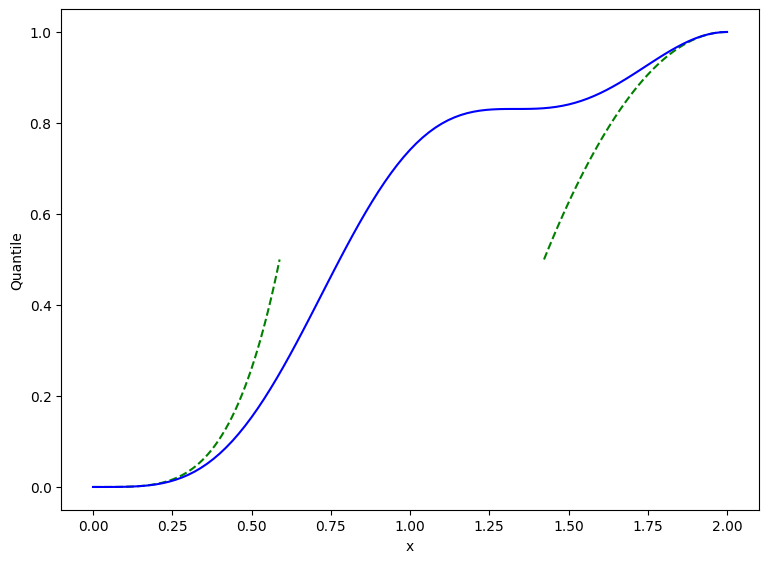

In [46]:
fig,ax = plot.subplots(1,1, figsize=figSize)

asymGrid = Grid1(rightMaxX, 2, nPlot)
gridAsym = [rightAsymCdfSym.subs(xSym, x) for x in asymGrid]
plot.plot(asymGrid,gridAsym, '--', c='green')

leftGrid = Grid1(0, leftMaxX, nPlot)
leftAsymAtan = [leftAsymCdfSym.subs(xSym, x) for x in leftGrid]
plot.plot(leftGrid,leftAsymAtan, '--', color='green')

xGrid = Grid1(0,2, nPlot)
cdfX = [dist.Cdf(x) for x in xGrid]
plot.plot(xGrid,cdfX, c='blue')

plot.xlabel('x')
plot.ylabel('Quantile')

## Asymptotices of PhiInv

This is needed to compute the asymptotic in terms of z

#### Left

In [47]:
mapProb.invSym

2*exp(z)/(exp(z) + 1)

In [48]:
mapInvLeft = 2 * sp.exp(zSym)
mapInvLeft

2*exp(z)

#### Right

In [49]:
mapProb.invSym

2*exp(z)/(exp(z) + 1)

In [50]:
term0 = sp.limit(mapProb.invSym, z=zSym, z0=sp.oo)
term0

2

In [51]:
res0 = (mapProb.invSym - term0).simplify()
res0

-2/(exp(z) + 1)

In [52]:
term1 = -2*sp.exp(-zSym)
term1

-2*exp(-z)

In [53]:
mapInvRight = term0 + term1 
mapInvRight

2 - 2*exp(-z)

### Asymptotices of CDF in terms of Z

In [54]:
leftAsymCdfZSym = leftAsymCdfSym.subs(xSym, mapInvLeft).simplify()
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

In [55]:
mapInvRight

2 - 2*exp(-z)

In [56]:
rightAsymCdfSym

-3*x**2/2 + 6*x - 5

In [57]:
ySym = sp.Symbol('y')
rightAsymCdfSym.subs(xSym, ySym + 2).simplify()

1 - 3*y**2/2

In [58]:
rightAsymCdfZSym = rightAsymCdfSym.subs(xSym, mapInvRight).simplify()
rightAsymCdfZSym

1 - 6*exp(-2*z)

In [59]:
rightAsymCdfZSym.subs(zSym,0)

-5

#### plot

In [60]:
leftZMax = fsolve(sp.lambdify(zSym, leftAsymCdfZSym - 0.5), 0)[0]
leftZMax

-1.2230373642857555

In [64]:
rightMaxZ = fsolve(sp.lambdify(zSym, rightAsymCdfZSym - 0.5), 2)[0]
rightMaxZ

1.2424533248940002

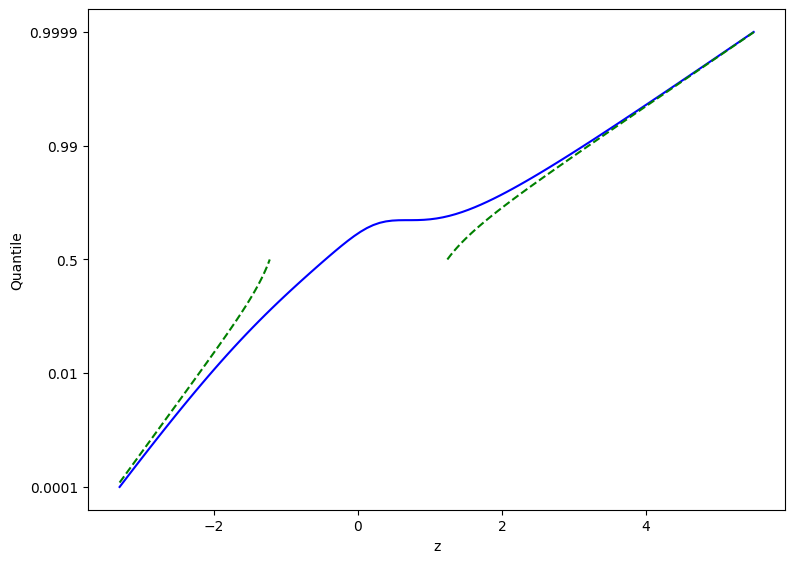

In [65]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [ArcTan(dist.Cdf(mapProb.invSym.subs(zSym, z).evalf())) for z in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

leftGrid = Grid1(zMin, leftZMax, nPlot)
leftAsymAtan = [ArcTan(leftAsymCdfZSym.subs(zSym, z)) for z in leftGrid]
plot.plot(leftGrid,leftAsymAtan, '--', color='green')

rightGrid = Grid1(rightMaxZ, zMax, nPlot)
rightAsymAtan = [ArcTan(rightAsymCdfZSym.subs(zSym, z)) for z in rightGrid]
plot.plot(rightGrid,rightAsymAtan, '--', color='green')

plot.xlabel('z')
plot.ylabel('Quantile')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [ArcTan(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

## A Nullifier with the Correct Asymptotic

#### In terms of Z

In [66]:
leftAsymCdfZSym

27*pi**2*exp(4*z)/4

In [67]:
rightAsymCdfZSym

1 - 6*exp(-2*z)

In [68]:
a0 = sp.Wild('a0')
a1 = sp.Wild('a1')

In [69]:
leftMatch = leftAsymCdfZSym.match(a0*sp.exp(a1 * zSym))
leftMatch

{a1_: 4, a0_: 27*pi**2/4}

In [70]:
b0 = sp.Wild('b0')
b1 = sp.Wild('b1')

In [71]:
rightMatch = rightAsymCdfZSym.match(1 - b0*sp.exp(-b1 * zSym))
rightMatch

{b1_: 2, b0_: 6}

In [72]:
nullZForm = \
	(sp.exp((a1 + b1)*zSym) + a0 * sp.exp(a1*zSym)) / \
	(sp.exp((a1 + b1)*zSym) + (a0 + b0) * sp.exp(a1*zSym) + 1)
nullZForm

(a0_*exp(z*a1_) + exp(z*(a1_ + b1_)))/((a0_ + b0_)*exp(z*a1_) + exp(z*(a1_ + b1_)) + 1)

In [73]:
nullZSym = nullZForm.subs(leftMatch).subs(rightMatch).simplify()
nullZSym

(4*exp(2*z) + 27*pi**2)*exp(4*z)/(4*exp(6*z) + 3*(8 + 9*pi**2)*exp(4*z) + 4)

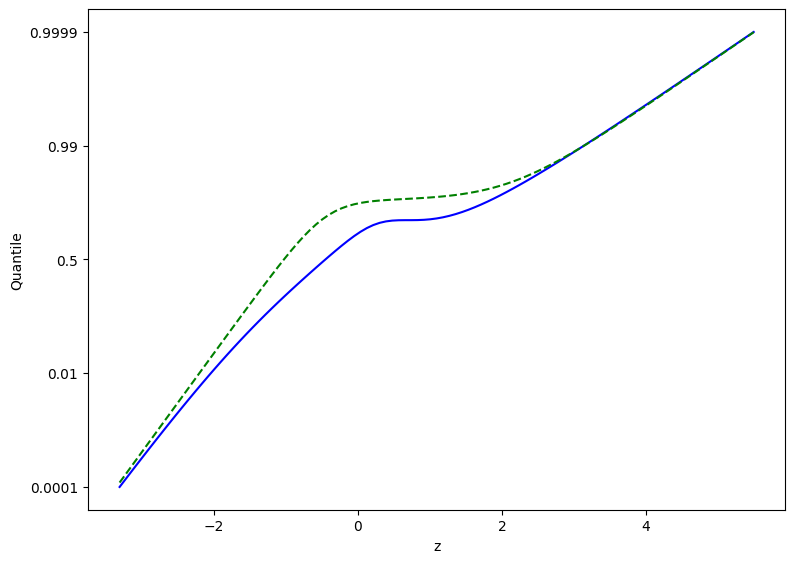

In [74]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
cdfGridZ = [ArcTan(dist.Cdf(mapProb.invSym.subs(zSym, z).evalf())) for z in zGrid]
plot.plot(zGrid,cdfGridZ, c='blue')

nullGridZ = [ArcTan(nullZSym.subs(zSym, z).evalf()) for z in zGrid]
plot.plot(zGrid,nullGridZ, '--', c="green")

plot.xlabel('z')
plot.ylabel('Quantile')

xTicks = [1e-4, 1e-2, 0.5, 0.99, 0.9999]
xTickAtan = [ArcTan(q) for q in xTicks]
ax.set_yticks(xTickAtan, xTicks)

#### In terms of X

In [75]:
nullXSym = nullZSym.subs(zSym, mapProb.forSym).simplify()
nullXSym

x**4*(4*x**2 + 27*pi**2*(x - 2)**2)/(4*x**6 + 3*x**4*(8 + 9*pi**2)*(x - 2)**2 + 4*(x - 2)**6)

Text(0, 0.5, 'Quantile')

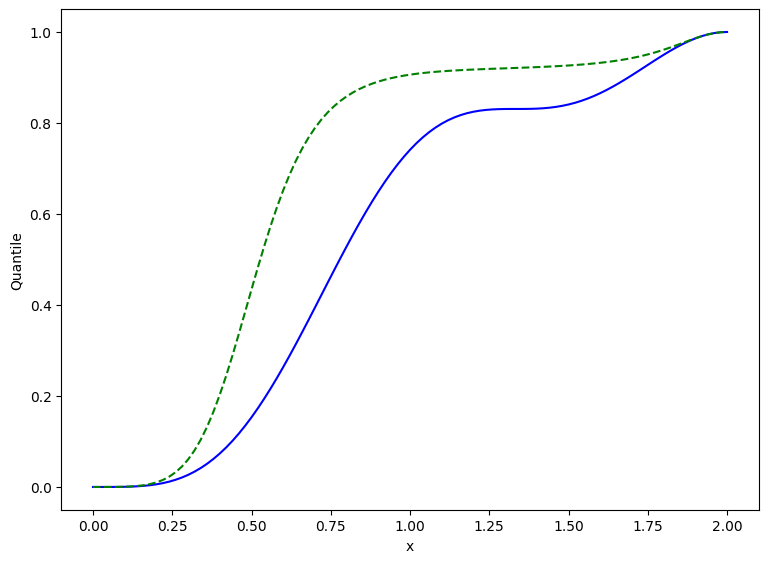

In [76]:
fig,ax = plot.subplots(1,1, figsize=figSize)

xGrid = Grid1(0,2, nPlot)
cdfGridX = [dist.Cdf(x) for x in xGrid]
plot.plot(xGrid,cdfGridX, c='blue')

nullGridX = [nullXSym.subs(xSym, x).evalf() for x in xGrid]
plot.plot(xGrid,nullGridX, '--', c="green")

plot.xlabel('x')
plot.ylabel('Quantile')

## The Residual

In [77]:
temp = sp.integrate(dist.pdfSym, xSym)
cdfSym = temp - temp.subs(xSym, 0)
cdfSym

-x**3/4 + x**2*sin(3*pi*x/2)/(2*pi) + 3*x**2/4 - x*sin(3*pi*x/2)/pi + 2*x*cos(3*pi*x/2)/(3*pi**2) - 4*sin(3*pi*x/2)/(9*pi**3) - 2*cos(3*pi*x/2)/(3*pi**2) + 2/(3*pi**2)

#### Left

In [78]:
leftNullNonZero = NonZeroTerm(nullXSym, xSym, 0)
leftNullNonZero

((27*pi**2/64, 4),
 (27*pi**2/32, 5),
 (1/64 + 135*pi**2/128, 6),
 (3/64 + 135*pi**2/128, 7))

In [79]:
leftNullAsym2 = MakeTerm(*leftNullNonZero[0], xSym) + MakeTerm(*leftNullNonZero[1], xSym)
leftNullAsym2

27*pi**2*x**5/32 + 27*pi**2*x**4/64

In [80]:
sp.series(cdfSym, x0=0)

27*pi**2*x**4/64 - 27*pi**2*x**5/160 + O(x**6)

In [81]:
leftCdfNonZero = NonZeroTerm(cdfSym, xSym, 0)
leftCdfNonZero

((27*pi**2/64, 4), (-27*pi**2/160, 5), (-27*pi**4/512, 6), (81*pi**4/3584, 7))

In [82]:
leftCdfAsym2 = \
	MakeTerm(*leftCdfNonZero[0], xSym) + \
	MakeTerm(*leftCdfNonZero[1], xSym)
leftCdfAsym2

-27*pi**2*x**5/160 + 27*pi**2*x**4/64

In [83]:
leftResX = leftCdfAsym2 - leftNullAsym2
leftResX

-81*pi**2*x**5/80

#### Right

In [84]:
rightNullNonZero = NonZeroTerm(nullXSym, xSym, 2)
rightNullNonZero

((1, 0),
 (-3/2, 2),
 (3/2, 3),
 (9/8 + 81*pi**2/32, 4),
 (-81*pi**2/16 - 15/4, 5),
 (-2187*pi**4/512 - 81*pi**2/64 + 113/64, 6),
 (309/64 + 1053*pi**2/64 + 6561*pi**4/512, 7))

In [85]:
rightNullAsym2 = \
	MakeTerm(*rightNullNonZero[0], 2 - xSym) + \
	MakeTerm(*rightNullNonZero[1], 2 - xSym) + \
	MakeTerm(*rightNullNonZero[2], 2 - xSym)
rightNullAsym2

3*(2 - x)**3/2 - 3*(2 - x)**2/2 + 1

In [86]:
rightCdfNonZero = NonZeroTerm(cdfSym, xSym, 2)
rightCdfNonZero

((1, 0),
 (-3/2, 2),
 (-1/2, 3),
 (27*pi**2/64, 4),
 (27*pi**2/160, 5),
 (-27*pi**4/512, 6),
 (-81*pi**4/3584, 7))

In [87]:
rightCdfAsym2 = \
	MakeTerm(*rightCdfNonZero[0], 2 - xSym) + \
	MakeTerm(*rightCdfNonZero[1], 2 - xSym) + \
	MakeTerm(*rightCdfNonZero[2], 2 - xSym)
rightCdfAsym2

-(2 - x)**3/2 - 3*(2 - x)**2/2 + 1

In [88]:
rightResX = rightCdfAsym2 - rightNullAsym2
rightResX

-2*(2 - x)**3

#### Do Plot

In [89]:
resXSym = cdfSym - nullXSym
resXSym

-x**4*(4*x**2 + 27*pi**2*(x - 2)**2)/(4*x**6 + 3*x**4*(8 + 9*pi**2)*(x - 2)**2 + 4*(x - 2)**6) - x**3/4 + x**2*sin(3*pi*x/2)/(2*pi) + 3*x**2/4 - x*sin(3*pi*x/2)/pi + 2*x*cos(3*pi*x/2)/(3*pi**2) - 4*sin(3*pi*x/2)/(9*pi**3) - 2*cos(3*pi*x/2)/(3*pi**2) + 2/(3*pi**2)

In [90]:
leftXMax = fsolve(sp.lambdify(xSym, leftResX + 0.2), 0.3)[0]
leftXMax

0.45736933536176394

In [91]:
rightMin = fsolve(sp.lambdify(xSym, rightResX + 0.2), 1.8)[0]
rightMin

1.535841116638722

Text(0, 0.5, 'Absolute Value of Residual')

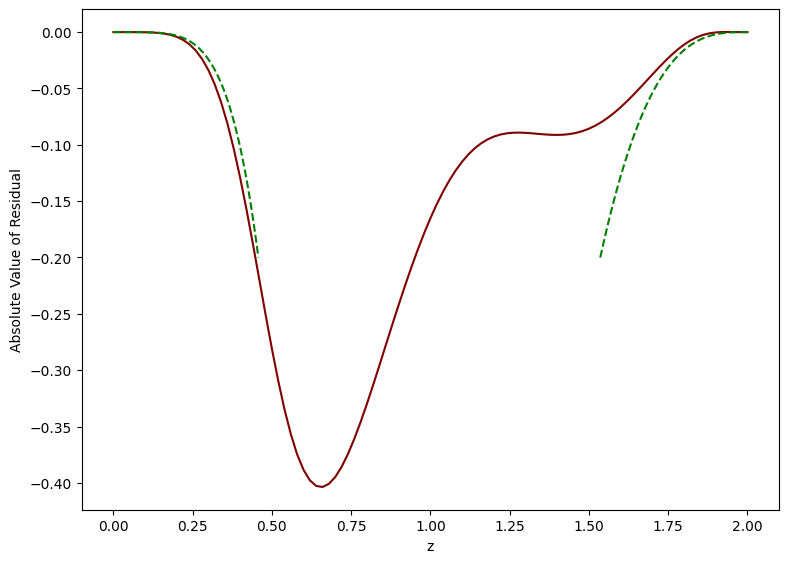

In [92]:
fig,ax = plot.subplots(1,1, figsize=figSize)

xGrid = Grid1(0,2, nPlot)
resZ = [resXSym.subs(xSym,x).evalf() for x in xGrid]
plot.plot(xGrid, resZ, c="maroon")

xGrid = Grid1(0,leftXMax, nPlot)
leftGrid = [leftResX.subs(xSym, x).evalf() for x in xGrid]
plot.plot(xGrid, leftGrid, '--', c="green")

xGrid = Grid1(rightMin,2, nPlot)
rightGrid = [rightResX.subs(xSym, x).evalf() for x in xGrid]
plot.plot(xGrid, rightGrid, '--', c="green")

plot.xlabel('z')
plot.ylabel('Absolute Value of Residual')

### On an ArcTan Scale in Terms of Z

In [93]:
leftResZ = leftResX.subs(xSym, mapInvLeft)
leftResZ

-162*pi**2*exp(5*z)/5

In [94]:
leftZMax = fsolve(sp.lambdify(zSym, leftResZ + 1e-2), -2)[0]
leftZMax

-2.074557676097035

In [95]:
rightResZ = rightResX.subs(xSym, mapInvRight)
rightResZ

-16*exp(-3*z)

Note the sign of the residual is positive on the right and negative on the left

In [98]:
rightZMin = fsolve(sp.lambdify(zSym, rightResZ + 1e-2), 3)[0]
rightZMin

2.459252969409291

#### Do Plot

In [99]:
resZSym = resXSym.subs(xSym, mapProb.invSym).simplify()
resZSym

(2*pi*(1 - cos(3*pi*exp(z)/(exp(z) + 1)))*(exp(z) + 1)**3*(4*exp(6*z) + (24 + 27*pi**2)*exp(4*z) + 4)/3 + pi**3*(exp(z) + 1)**3*(-36*exp(2*z) - 243*pi**2)*exp(4*z)/9 - 4*(exp(z) + 1)**3*(4*exp(6*z) + (24 + 27*pi**2)*exp(4*z) + 4)*sin(3*pi*exp(z)/(exp(z) + 1))/9 - 2*pi**2*(exp(z) + 1)**2*(4*exp(6*z) + (24 + 27*pi**2)*exp(4*z) + 4)*exp(z)*sin(3*pi*exp(z)/(exp(z) + 1)) + 4*pi*(exp(z) + 1)**2*(4*exp(6*z) + (24 + 27*pi**2)*exp(4*z) + 4)*exp(z)*cos(3*pi*exp(z)/(exp(z) + 1))/3 + 2*pi**2*(exp(z) + 1)*(4*exp(6*z) + (24 + 27*pi**2)*exp(4*z) + 4)*exp(2*z)*sin(3*pi*exp(z)/(exp(z) + 1)) + 3*pi**3*(exp(z) + 1)*(4*exp(6*z) + (24 + 27*pi**2)*exp(4*z) + 4)*exp(2*z) + pi**3*(-72*exp(6*z) + (-486*pi**2 - 432)*exp(4*z) - 72)*exp(3*z)/9)/(pi**3*(exp(z) + 1)**3*(4*exp(6*z) + 3*(8 + 9*pi**2)*exp(4*z) + 4))

This is a bit out of control ... probably should not do full symbolic form

In [100]:
zMin = fsolve(lambda z: abs(resZSym.subs(zSym,z[0]).evalf()) - 1e-6, -3)[0]
zMin

-3.9088753672263605

In [101]:
zMax = fsolve(lambda z: abs(resZSym.subs(zSym,z[0]).evalf()) - 1e-6, 6)[0]
zMax

5.493214707279178

Text(0, 0.5, 'Absolute Value of Residual')

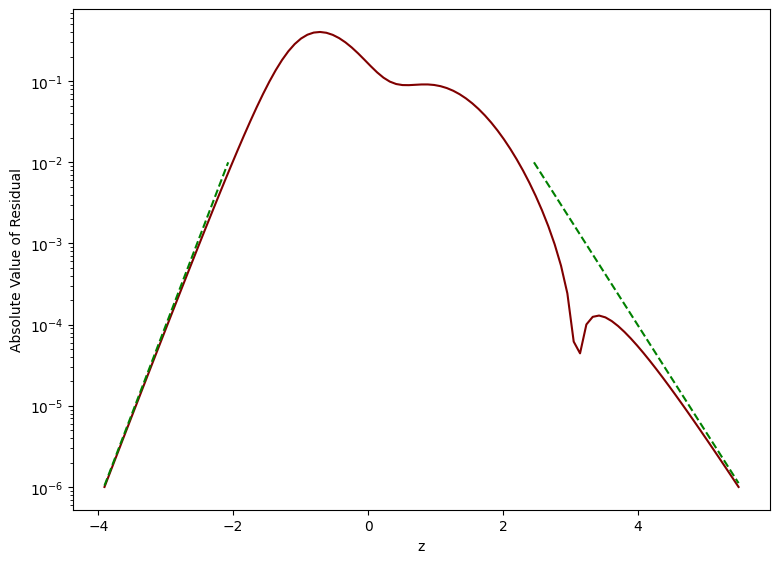

In [102]:
fig,ax = plot.subplots(1,1, figsize=figSize)

zGrid = Grid1(zMin,zMax, nPlot)
resZ = [resZSym.subs(zSym, z).evalf() for z in zGrid]
absResZ = [abs(r) for r in resZ]
plot.semilogy(zGrid, absResZ, c="maroon")

zGrid = Grid1(zMin,leftZMax, nPlot)
leftGrid = [abs(leftResZ.subs(zSym, z)) for z in zGrid]
plot.semilogy(zGrid, leftGrid, '--', c="green")

zGrid = Grid1(rightZMin,zMax, nPlot)
rightGrid = [abs(rightResZ.subs(zSym, z)) for z in zGrid]
plot.semilogy(zGrid, rightGrid, '--', c="green")

plot.xlabel('z')
plot.ylabel('Absolute Value of Residual')

In [106]:
print(datetime.now())

2024-07-16 18:40:45.891259
